In [ ]:
# Import standard libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Load the Wine Quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Display the first five rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Get dataset information
data.info()

Dataset shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Get statistical summary
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


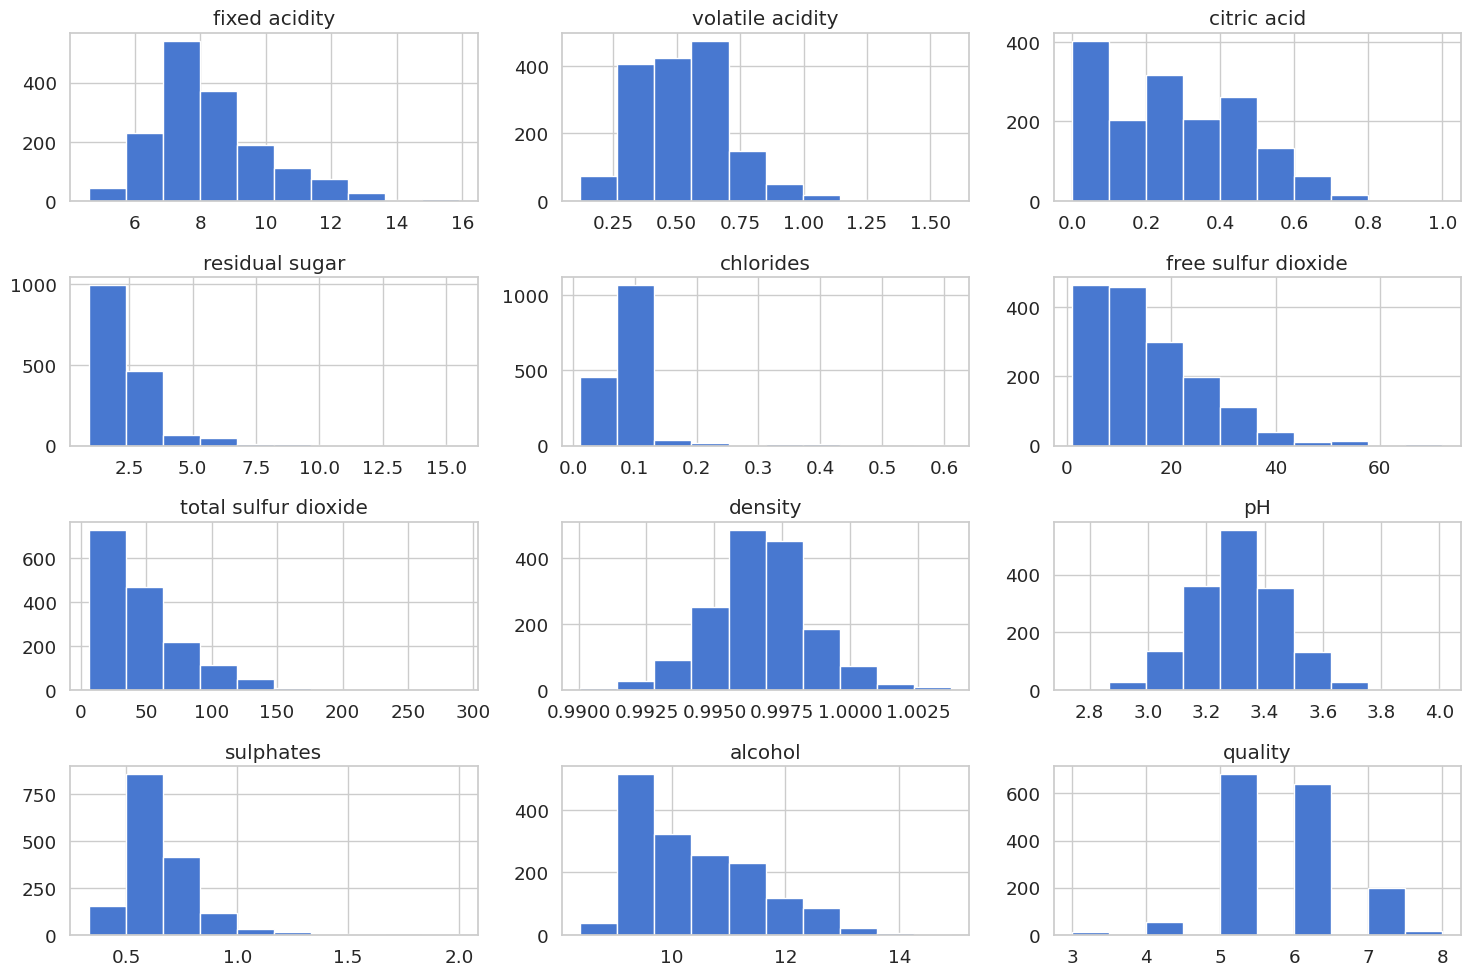

In [ ]:
# Plot histograms for each feature
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

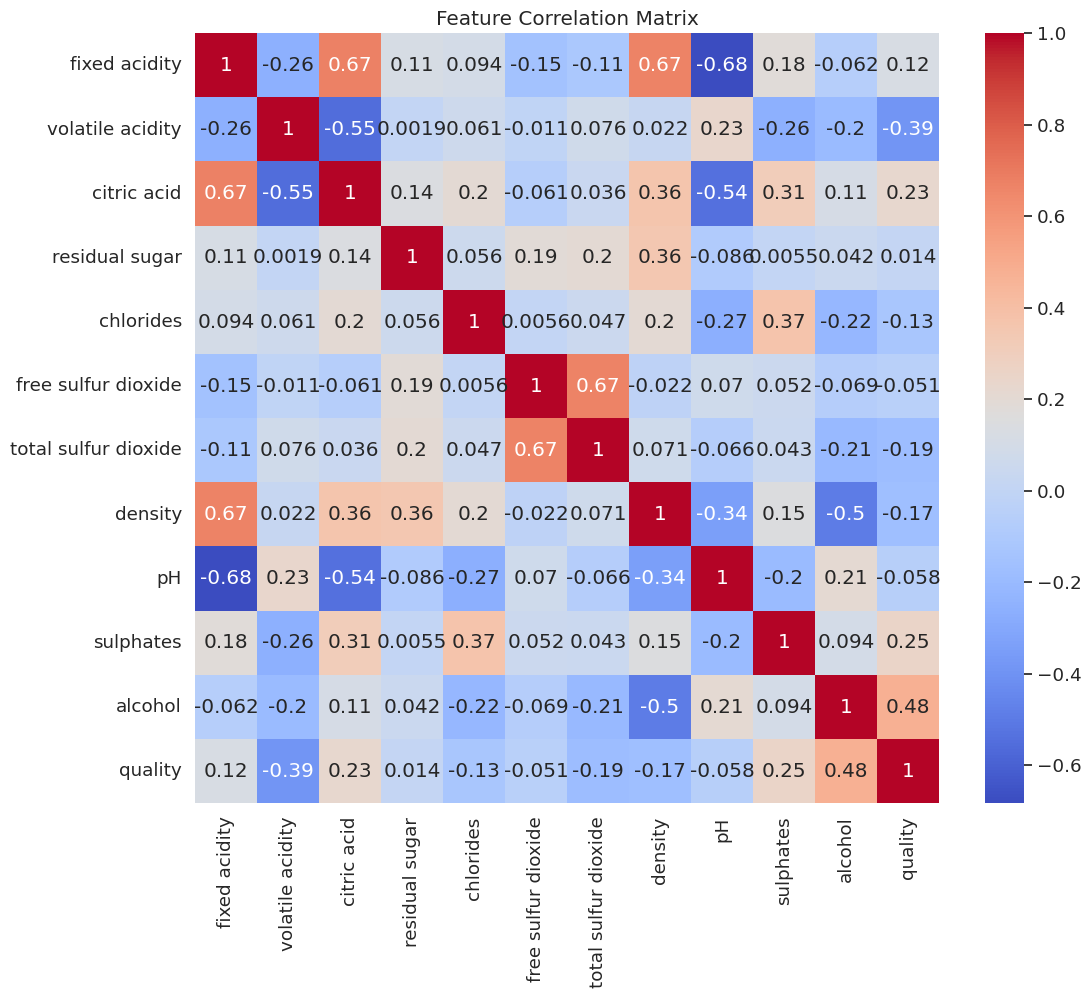

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


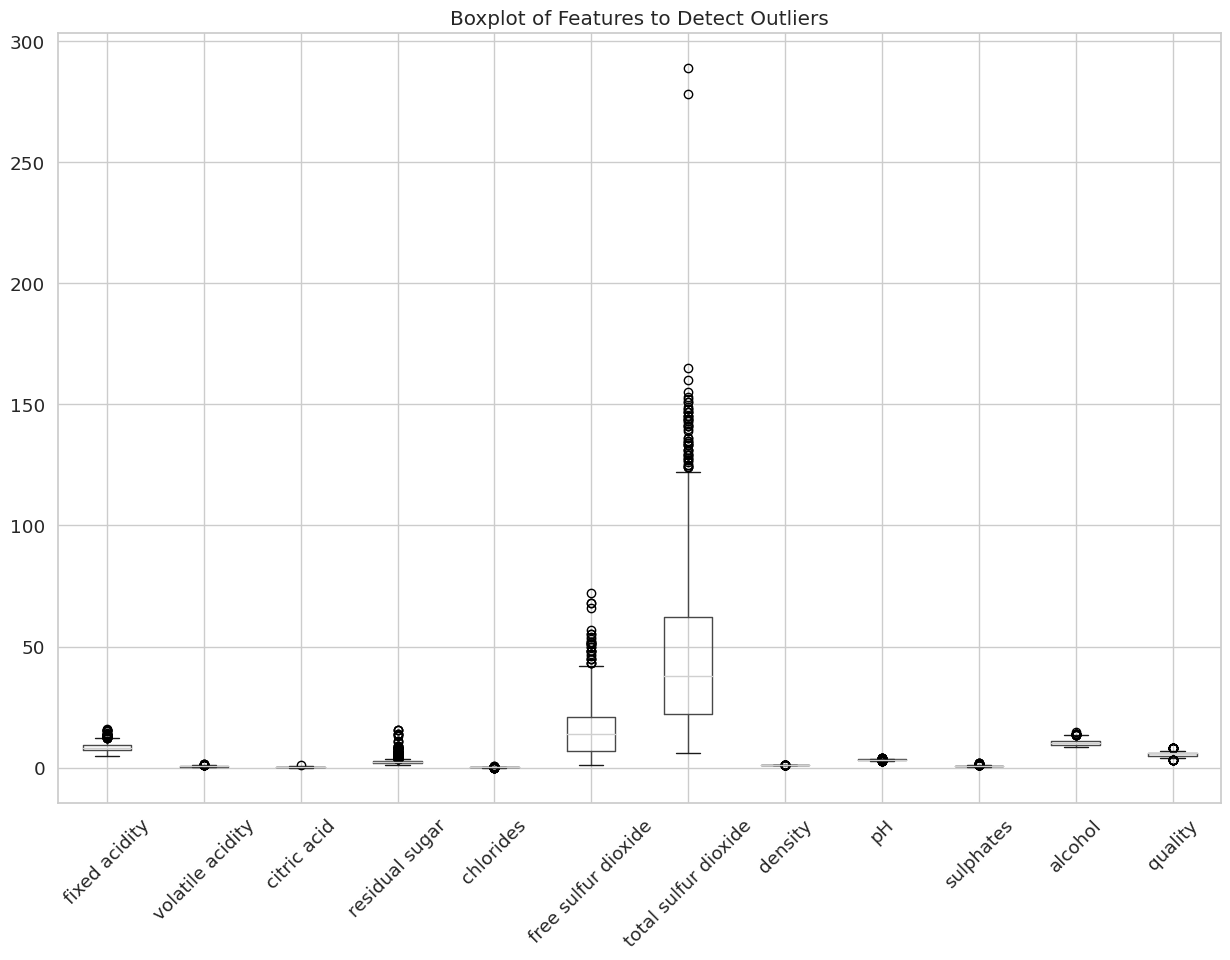

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [ ]:
y = data['quality']
y_binary = y.apply(lambda x: 1 if x >= 6 else 0)

In [ ]:
# Create a new feature 'density_diff'
data['density_diff'] = data['density'] - data['alcohol'] * 0.01

# Update features and apply scaling
X = data.drop('quality', axis=1)
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print("Baseline Model - Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC AUC Score: {roc_auc_lr:.4f}")

Baseline Model - Logistic Regression Performance:
Accuracy: 0.7406
Precision: 0.7683
Recall: 0.7368
F1 Score: 0.7522
ROC AUC Score: 0.8244


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

In [ ]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = metrics

# Display the results
results_df = pd.DataFrame(results).T
print("Model Comparison:")
display(results_df)

Model Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
K-Nearest Neighbors,0.740625,0.744444,0.783626,0.763533,0.806723
Decision Tree,0.746875,0.767857,0.754386,0.761062,0.746320
Random Forest,0.790625,0.809524,0.795322,0.802360,0.899976
Support Vector Machine,0.746875,0.792208,0.713450,0.750769,0.833922
Gradient Boosting,0.778125,0.820513,0.748538,0.782875,0.869540


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=models['Random Forest'],
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:")
print(grid_search.best_params_)

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Get the best estimator
best_rf = grid_search.best_estimator_

# Evaluate the optimized Random Forest
metrics_rf = evaluate_model(best_rf, X_train, y_train, X_test, y_test)

# Display performance metrics
print("Optimized Random Forest Performance:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

Optimized Random Forest Performance:
Accuracy: 0.8063
Precision: 0.8344
Recall: 0.7953
F1 Score: 0.8144
ROC AUC: 0.9000


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1')

print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean():.4f}")

Cross-Validation F1 Scores: [0.76806084 0.82437276 0.81588448 0.82352941 0.84057971]
Mean Cross-Validation F1 Score: 0.8145


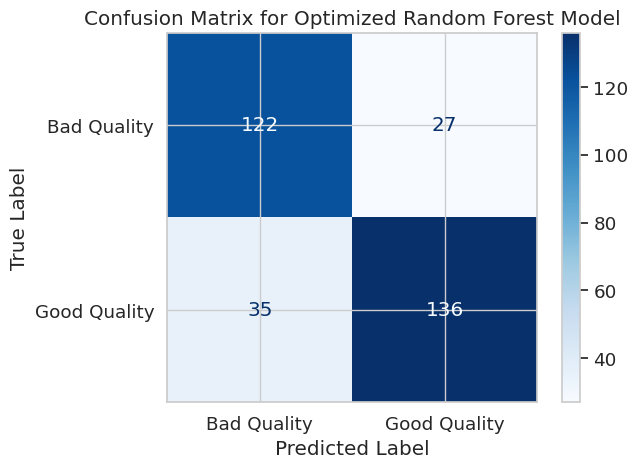

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad Quality', 'Good Quality'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Optimized Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Bad Quality', 'Good Quality'])

# Print the classification report
print("Classification Report for Optimized Random Forest Model:")
print(report)

Classification Report for Optimized Random Forest Model:
              precision    recall  f1-score   support

 Bad Quality       0.78      0.82      0.80       149
Good Quality       0.83      0.80      0.81       171

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



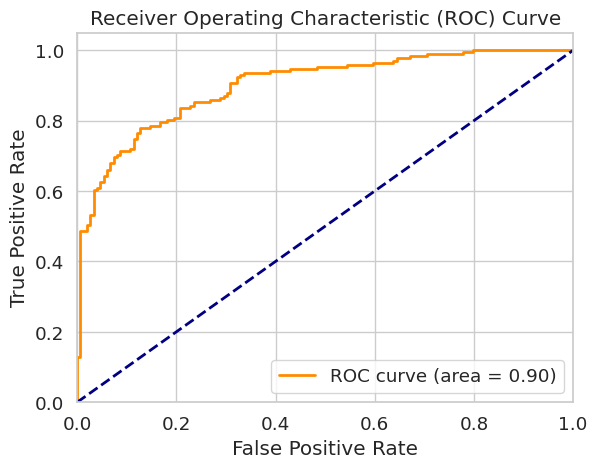

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
y_scores = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

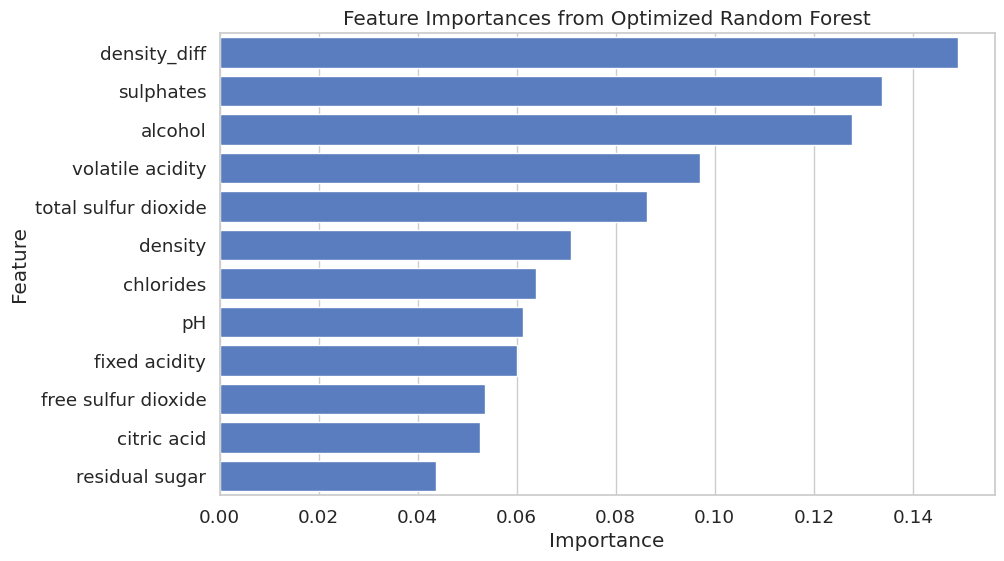

In [ ]:
# Retrieve feature importances
importances = best_rf.feature_importances_
feature_names = data.drop('quality', axis=1).columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Optimized Random Forest')
plt.show()

In [ ]:
# Install imblearn (if not already installed)
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Retrain the model on SMOTE data
best_rf_smote = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_rf_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
metrics_smote = evaluate_model(best_rf_smote, X_train_smote, y_train_smote, X_test, y_test)

# Display performance metrics
print("Optimized Random Forest Performance with SMOTE:")
for metric, value in metrics_smote.items():
    print(f"{metric}: {value:.4f}")

Optimized Random Forest Performance with SMOTE:
Accuracy: 0.8031
Precision: 0.8333
Recall: 0.7895
F1 Score: 0.8108
ROC AUC: 0.8966


In [ ]:
import joblib

# Save the optimized Random Forest model
joblib.dump(best_rf, 'optimized_random_forest_model.joblib')

['optimized_random_forest_model.joblib']

In [ ]:
# Load the model
loaded_model = joblib.load('optimized_random_forest_model.joblib')

# Predict using the loaded model
y_loaded_pred = loaded_model.predict(X_test)

# Verify the loaded model's performance
print(f"Accuracy of Loaded Model: {accuracy_score(y_test, y_loaded_pred):.4f}")

Accuracy of Loaded Model: 0.8063


In [ ]:
# Display the feature importance DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                 Feature  Importance
11          density_diff    0.149025
9              sulphates    0.133695
10               alcohol    0.127791
1       volatile acidity    0.096997
6   total sulfur dioxide    0.086233
7                density    0.070964
4              chlorides    0.063939
8                     pH    0.061340
0          fixed acidity    0.060105
5    free sulfur dioxide    0.053652
2            citric acid    0.052498
3         residual sugar    0.043761
